In [698]:
import pandas as pd
import numpy as np

import openpyxl

data = pd.read_excel('FR2209_assessment_data.xlsx', index_col=0, header=0)
data = data.iloc[:121,:]

stocks = data.loc[:,['BYD','DNB','IAG','SAM','CHM','X']]

returns = stocks.pct_change() 
std = returns.std() * np.sqrt(12)
mean = returns.mean() * 12


returns



,BYD,DNB,IAG,SAM,CHM,X
date,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.062767,0.065856,0.075332,0.085985,0.065668,-0.065486
2013-03-29,0.258752,-0.017578,0.060728,0.055986,0.109166,-0.064299
2013-04-30,0.451028,0.115651,0.098254,-0.015033,-0.026455,-0.087180
2013-05-31,0.085833,0.018199,0.005871,0.059864,0.024632,-0.003596
...,...,...,...,...,...,...
2022-08-31,-0.019456,-0.092640,-0.129345,0.170433,-0.068707,-0.030908
2022-09-30,-0.121827,-0.130526,-0.159940,-0.011528,-0.170479,-0.207696
2022-10-31,0.212171,0.037127,0.319528,-0.112438,-0.085301,0.123621


In [699]:
mean

BYD    7.034834
DNB    4.826857
IAG    3.139361
SAM    3.033143
CHM    2.424967
X      2.318441
dtype: float64

In [700]:
#asssume the risk free of 0.5%, calculate the excess return for each stock
R_f = 0.001
excessret = mean - R_f
excessret

BYD    7.033834
DNB    4.825857
IAG    3.138361
SAM    3.032143
CHM    2.423967
X      2.317441
dtype: float64

In [701]:
#sharpe for each stock
sharpe = excessret/std
sharpe

BYD    0.327378
DNB    0.304560
IAG    0.468110
SAM    0.382405
CHM    0.389012
X      0.336103
dtype: float64

In [702]:
#returns variance / covariance matrix 
VarCov_Mat = returns.cov()
VarCov_Mat

,BYD,DNB,IAG,SAM,CHM,X
BYD,38.468336,28.357208,7.463509,-0.101051,-0.034629,12.280237
DNB,28.357208,20.922912,5.493531,-0.077406,-0.023190,9.055468
IAG,7.463509,5.493531,3.745670,-0.012002,-0.036343,2.407210
SAM,-0.101051,-0.077406,-0.012002,5.239277,0.368444,0.004649
CHM,-0.034629,-0.023190,-0.036343,0.368444,3.235537,-0.010240
X,12.280237,9.055468,2.407210,0.004649,-0.010240,3.961793


In [703]:
import numpy as np
from itertools import combinations, permutations, product

# Generate permutations of weights in multiples of 0.1
permutations = product(range(11), repeat=len(mean))

# Filter permutations where the sum equals 10 (1 in multiples of 0.1)
valid_permutations = [p for p in permutations if sum(p) == 10]

# Convert permutations to multiples of 0.1 and normalize each permutation
normalized_permutations = [[weight / 10 for weight in p] for p in valid_permutations]

print(normalized_permutations)

[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.1, 0.9], [0.0, 0.0, 0.0, 0.0, 0.2, 0.8], [0.0, 0.0, 0.0, 0.0, 0.3, 0.7], [0.0, 0.0, 0.0, 0.0, 0.4, 0.6], [0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.6, 0.4], [0.0, 0.0, 0.0, 0.0, 0.7, 0.3], [0.0, 0.0, 0.0, 0.0, 0.8, 0.2], [0.0, 0.0, 0.0, 0.0, 0.9, 0.1], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.1, 0.0, 0.9], [0.0, 0.0, 0.0, 0.1, 0.1, 0.8], [0.0, 0.0, 0.0, 0.1, 0.2, 0.7], [0.0, 0.0, 0.0, 0.1, 0.3, 0.6], [0.0, 0.0, 0.0, 0.1, 0.4, 0.5], [0.0, 0.0, 0.0, 0.1, 0.5, 0.4], [0.0, 0.0, 0.0, 0.1, 0.6, 0.3], [0.0, 0.0, 0.0, 0.1, 0.7, 0.2], [0.0, 0.0, 0.0, 0.1, 0.8, 0.1], [0.0, 0.0, 0.0, 0.1, 0.9, 0.0], [0.0, 0.0, 0.0, 0.2, 0.0, 0.8], [0.0, 0.0, 0.0, 0.2, 0.1, 0.7], [0.0, 0.0, 0.0, 0.2, 0.2, 0.6], [0.0, 0.0, 0.0, 0.2, 0.3, 0.5], [0.0, 0.0, 0.0, 0.2, 0.4, 0.4], [0.0, 0.0, 0.0, 0.2, 0.5, 0.3], [0.0, 0.0, 0.0, 0.2, 0.6, 0.2], [0.0, 0.0, 0.0, 0.2, 0.7, 0.1], [0.0, 0.0, 0.0, 0.2, 0.8, 0.0], [0.0, 0.0, 0.0, 0.3, 0.0, 0.7], [0.0, 0

In [704]:
weighted_ret = [[weight * mean for weight, mean in zip(p, mean)] for p in normalized_permutations]
# Sum of weights method
portfolio_rets = [sum(weights) for weights in weighted_ret]
# portfolio_rets

In [705]:
# w^T mean method
portfolio_rets2 = np.dot(normalized_permutations, mean)

In [706]:
# Initialize an empty list to store portfolio variances
portfolio_variances = []

# Iterate over each normalized permutation of weights
for weights in normalized_permutations:
    # Calculate portfolio variance using the given formula
    portfolio_variance = np.dot(np.dot(np.transpose(weights),VarCov_Mat),weights)
    # Append the portfolio variance to the list
    portfolio_variances.append(portfolio_variance)

print("Portfolio Variances:", portfolio_variances)
portfolio_std = np.sqrt(portfolio_variances)

#portfolio_variances = np.dot(np.dot(normalized_permutations, VarCov_Mat), np.transpose(normalized_permutations))

 

Portfolio Variances: [3.9617925958751234, 3.2395641826961192, 2.661691950996437, 2.2281759007760735, 1.9390160320350316, 1.7942123447733098, 1.7937648389909089, 1.9376735146878281, 2.2259383718640686, 2.658559410519629, 3.23553663065451, 3.2622815569914296, 2.6267696965599074, 2.135614017607705, 1.7888145201348236, 1.5863712041412628, 1.5282840696270221, 1.6145531165921025, 1.8451783450365031, 2.2201597549602248, 2.7394973463632666, 2.7466059641098566, 2.1978106564258146, 1.7933715302210942, 1.5332885854956937, 1.4175618222496142, 1.446191240482855, 1.6191768401954165, 1.9365186213872978, 2.398216584058501, 2.4147658172304025, 1.9526870622938428, 1.6349644888366033, 1.4615980968586844, 1.4325878863600856, 1.547933857340808, 1.8076360098008504, 2.2116943437402132, 2.26676111635307, 1.8913989141639909, 1.6603928934542327, 1.573743054223795, 1.6314493964726777, 1.8335119202008812, 2.1799306254084048, 2.302591861477857, 2.0139462120362595, 1.8696567440739826, 1.869723457591026, 2.014146352

Text(0, 0.5, 'Returns')

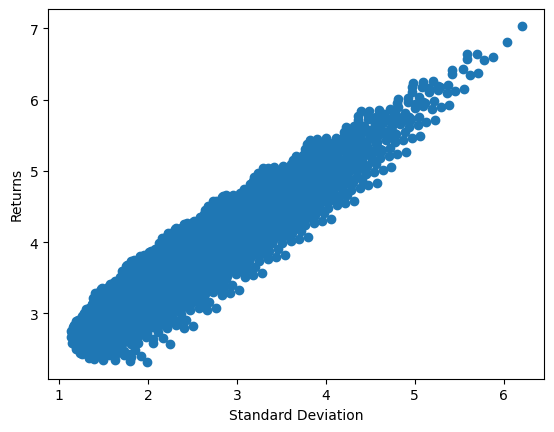

In [707]:
import matplotlib.pyplot as plt
plt.scatter(portfolio_std, portfolio_rets)
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

In [708]:
sharpe_portolios = ((portfolio_rets2 - R_f ))/ portfolio_std
sharpe_portolios

array([1.16429446, 1.29347239, 1.43352156, ..., 1.1647641 , 1.12812097,
       1.13407142])

In [709]:
max_sharpe_index = np.argmax(sharpe_portolios)
max_sharpe = max(sharpe_portolios)
# Retrieve the weights of the corresponding portfolio
optimal_weights = normalized_permutations[max_sharpe_index]
retmaxsharpe = portfolio_rets[max_sharpe_index]
stdmaxsharpe = portfolio_std[max_sharpe_index]
print('The portfolio with maximum Sharpe Ratio is: ', optimal_weights, ' with ratio: ', max_sharpe, ' The return on this portfolio is: ', retmaxsharpe, ' and Standard Deviation: ', stdmaxsharpe)

The portfolio with maximum Sharpe Ratio is:  [0.0, 0.0, 0.4, 0.3, 0.3, 0.0]  with ratio:  2.429837375446  The return on this portfolio is:  2.8931775210821638  and Standard Deviation:  1.1902761684004883


In [710]:
min_std_index = np.argmin(portfolio_std)
min_std = min(portfolio_std)
# Retrieve the weights of the corresponding portfolio
min_std_weights = normalized_permutations[min_std_index]
retminstd = portfolio_rets[min_std_index]
print('The portfolio with minimum Standard Deviation is: ', min_std_weights, ' with Standard Deviation: ', min_std, ' The return on this portfolio is: ', retminstd)

The portfolio with minimum Standard Deviation is:  [0.0, 0.0, 0.2, 0.2, 0.4, 0.2]  with Standard Deviation:  1.1309472530743756  The return on this portfolio is:  2.668175984897471


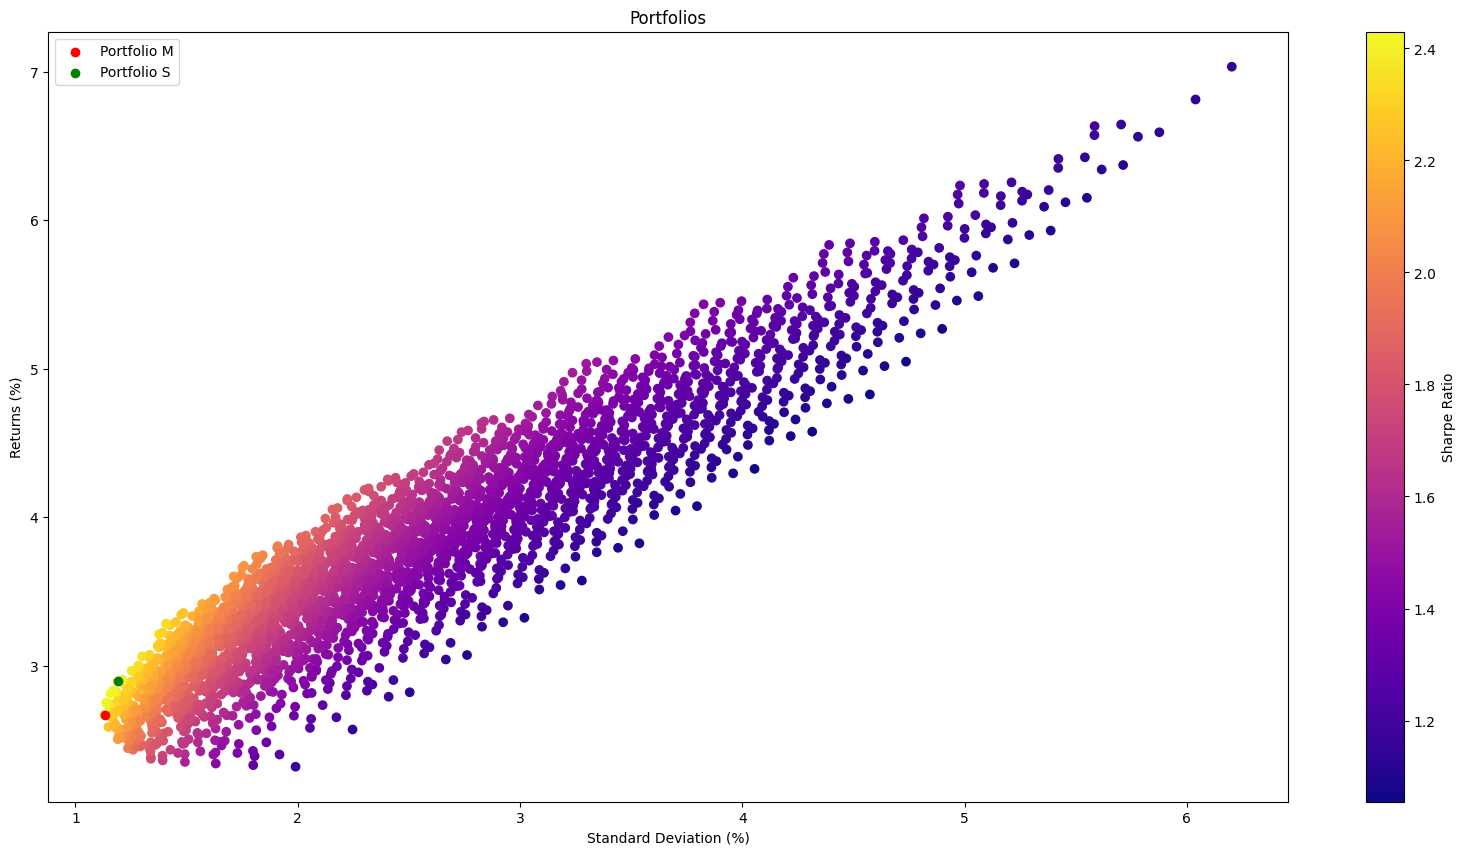

In [711]:
plt.figure(figsize=(20, 10))
plt.scatter(portfolio_std, portfolio_rets, c=sharpe_portolios, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_std, retminstd, color='r', label='Portfolio M')
plt.scatter(stdmaxsharpe, retmaxsharpe, color='g', label='Portfolio S')
plt.legend(loc='upper left')
plt.title('Portfolios')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Returns (%)')
plt.show()

In [712]:
#Ones Vector
one = np.empty((1, 6))
one[:] = 1

#Calculate A, B, and F
A = np.dot(np.dot(one, np.linalg.inv(VarCov_Mat)), mean)
B = np.dot(np.dot(mean.transpose(), np.linalg.inv(VarCov_Mat)), mean)
F = float(np.dot(np.dot(one, np.linalg.inv(VarCov_Mat)), one.transpose()))
#Calculate D
D = B * F - A ** 2

In [713]:
#Calculate Alpha_0
alpha_0 = ((np.dot(B*np.linalg.inv(VarCov_Mat), one.transpose().reshape(6)) - np.dot(A * np.linalg.inv(VarCov_Mat), mean)))/D
alpha_0 = alpha_0.flatten()
alpha_0

array([-0.85153817,  0.66575514,  0.02235107,  0.00914527,  0.02696382,
        1.12732286])

In [714]:
#Calculate Alpha_1
alpha_1 = (np.dot((F*np.linalg.inv(VarCov_Mat)),mean) - np.dot((A*np.linalg.inv(VarCov_Mat)),one.transpose().reshape(6)))/D
alpha_1 = alpha_1.flatten()
alpha_1

array([ 0.94098012, -1.40337511,  0.05685738,  0.04088417,  0.0593336 ,
        0.30531985])

In [715]:
MinPortfolioRet = min(portfolio_rets)
MaxPortfolioRet = max(portfolio_rets)
C = np.arange(MinPortfolioRet, MaxPortfolioRet, 0.01)
StdVector = []

for ret in C:
    w = alpha_0 + alpha_1 * ret
    Stds = np.sqrt((np.dot(np.dot(np.transpose(w), VarCov_Mat), w)))
    StdVector.append(Stds)


df = pd.DataFrame({"StdVector": StdVector, "C": C.tolist()})
df

,StdVector,C
0,0.734567,2.318441
1,0.737199,2.328441
2,0.739833,2.338441
3,0.742468,2.348441
4,0.745105,2.358441
...,...,...
467,2.021280,6.988441
468,2.024080,6.998441
469,2.026881,7.008441
470,2.029681,7.018441


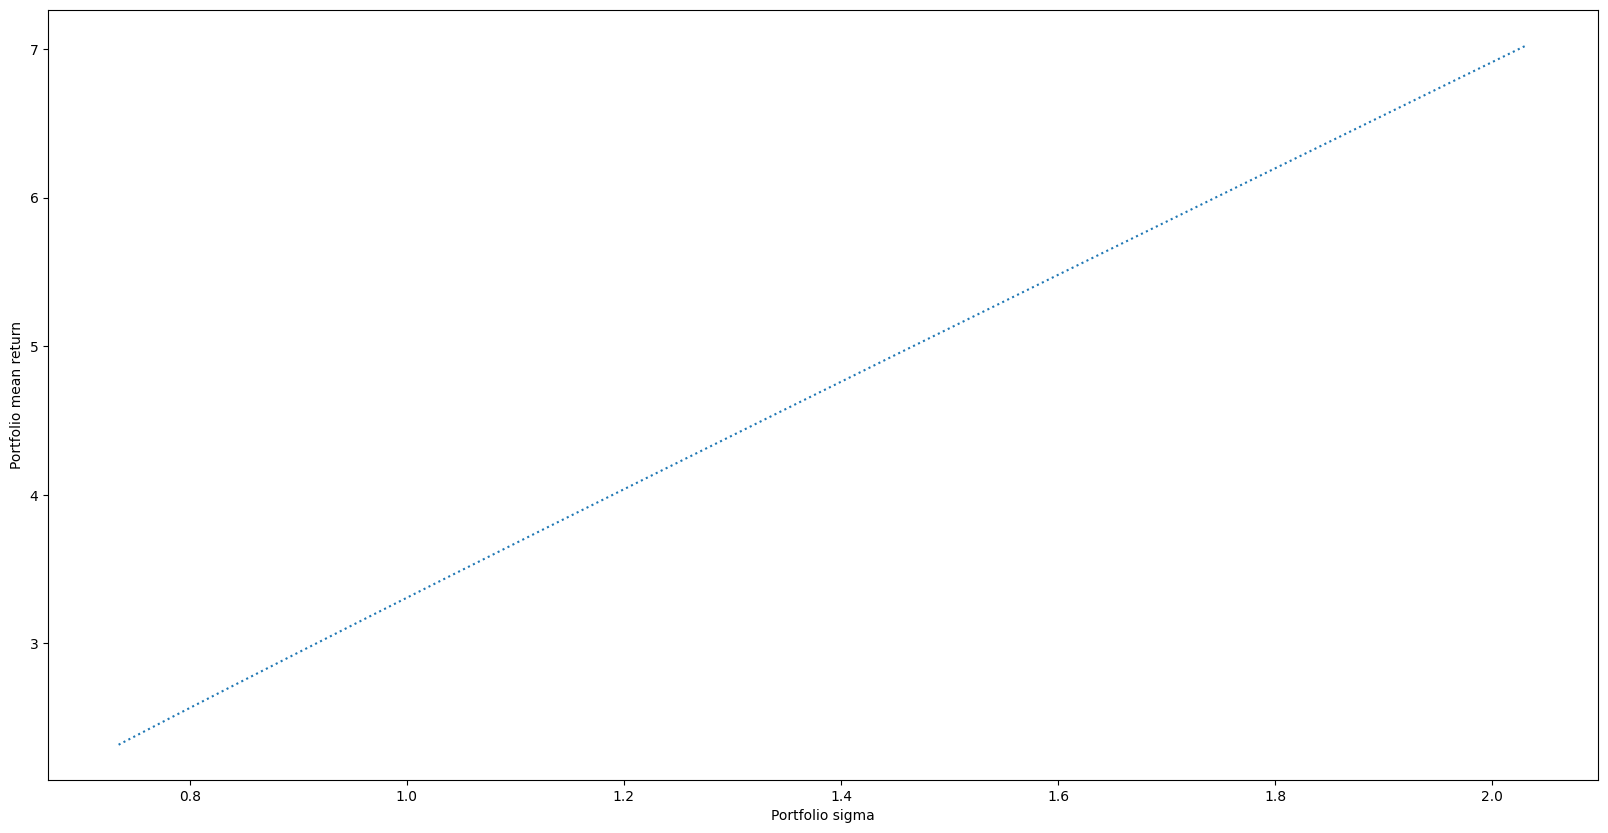

In [716]:
plt.figure(figsize=(20, 10))
plt.plot( df['StdVector'], df['C'] , linestyle = 'dotted')
plt.xlabel("Portfolio sigma")
plt.ylabel("Portfolio mean return")
plt.show()

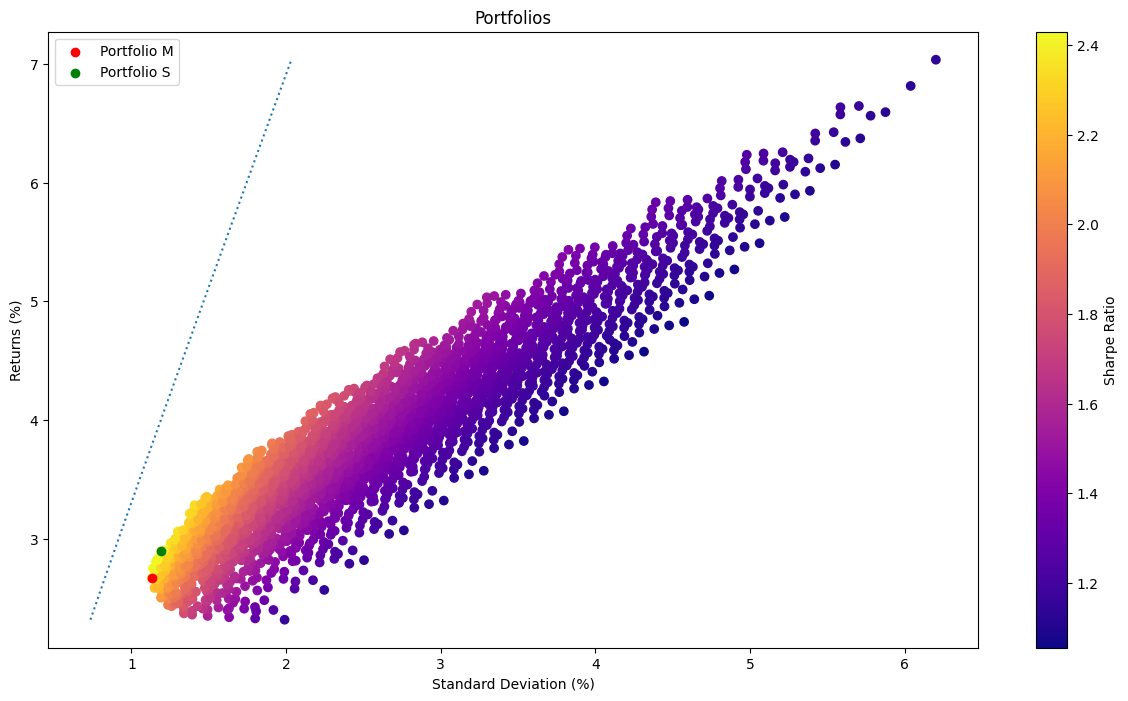

In [720]:
plt.figure(figsize=(15, 8))
plt.plot( df['StdVector'], df['C'] , linestyle = 'dotted')
plt.scatter(portfolio_std, portfolio_rets, c=sharpe_portolios, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_std, retminstd, color='r', label='Portfolio M')
plt.scatter(stdmaxsharpe, retmaxsharpe, color='g', label='Portfolio S')
plt.legend(loc='upper left')
plt.title('Portfolios')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Returns (%)')
plt.show()